# Analysis on one point on 1B


In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

with open("../most_sensitive_indices_in_training_softmax.json") as f:
    sensitive_neurons = json.load(f)

with open("../most_effective_indices_on_eigenscore_softmax.json") as f:
    effective_neurons = json.load(f)




In [7]:
print("sensitive_neurons", sensitive_neurons)
print("effective_neurons", effective_neurons)

sensitive_neurons {'156': 0.0022092022082096526, '17': 0.0021683768511845396, '413': 0.0020592616384099644, '98': 0.002033237384884801, '229': 0.0020251079286560244, '271': 0.002018347662555777, '291': 0.0020154817383219266, '118': 0.002005894938707064, '426': 0.002004791084950011, '11': 0.00200057103096466, '465': 0.001999982837955299, '71': 0.0019992465123129834, '328': 0.0019989679738123523, '215': 0.0019982308121597706, '456': 0.0019969381387048677, '439': 0.0019950423658659363, '492': 0.0019930742512382065, '29': 0.00199285111938605, '6': 0.0019921251597429016, '142': 0.0019904411751767775, '95': 0.001988665611137028, '376': 0.0019821528999001197, '282': 0.0019820932262349057, '496': 0.00198180179144051, '107': 0.0019811129531918338, '197': 0.00197521892327474, '35': 0.001974625347749852, '314': 0.001974507459491238, '194': 0.001974135866801587, '246': 0.0019737762226009745, '54': 0.001973671759189129, '191': 0.00197342565694037, '325': 0.001973419143448179, '416': 0.0019731636124

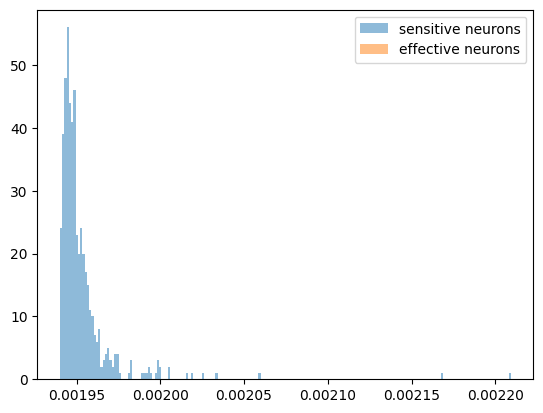

In [2]:
# given the two dictionaries, since each dictionary has the same keys, and the values are probabilities summing up to 1 for each dict, plot the distribution of the values 

sensitive_neurons_values = np.array(list(sensitive_neurons.values()))
effective_neurons_values = np.array(list(effective_neurons.values()))

plt.hist(sensitive_neurons_values, bins=200, alpha=0.5, label='sensitive neurons')
plt.hist(effective_neurons_values, bins=200, alpha=0.5, label='effective neurons')
plt.legend(loc='upper right')
plt.show()


[156  17 413  98 229 271 291 118 426  11 465  71 328 215 456 439 492  29
   6 142  95 376 282 496 107 197  35 314 194 246  54 191 325 416 263 308
 419 274 398 264 394 374 433 395 150  78 269 358 242  56 249 441 342  22
 171 112 476 152 365  40 312 322 301 256  81 391 231 463 176 121 316 189
 237 198 190 132 313 267 455  13  14 438 475 430 177 122 460 383 216 409
 230 113 327 338  30 129 161 247 320  61 279 143 336 166  15 470   2 339
 208 499 257 346 212  84 418 287 154 226 181  19 261 185  53 484  85  93
 494  87 334 462 179 158 172 146 160   8 298 123 228 116 423 486 491 201
  68 434  74 299 101 459 290 485 218 490 254  80  51 403 266 258 482 447
  47  28 331 200 222 205 421 138  92 259 351 388 415 468 207 149  24 204
 265 111  99 173 155 302  39 368 125 443 406 276  70 192  77 506 284 234
  26 315 170 504 392 411 199 251 466  41  76 135 488 131 120 353  31 370
  46 349 180  44 452 174 481 153  72 285 375 454 233 297 117  36 223  59
 321 163 178 211 133 310 360 502 508 209  83 497  2

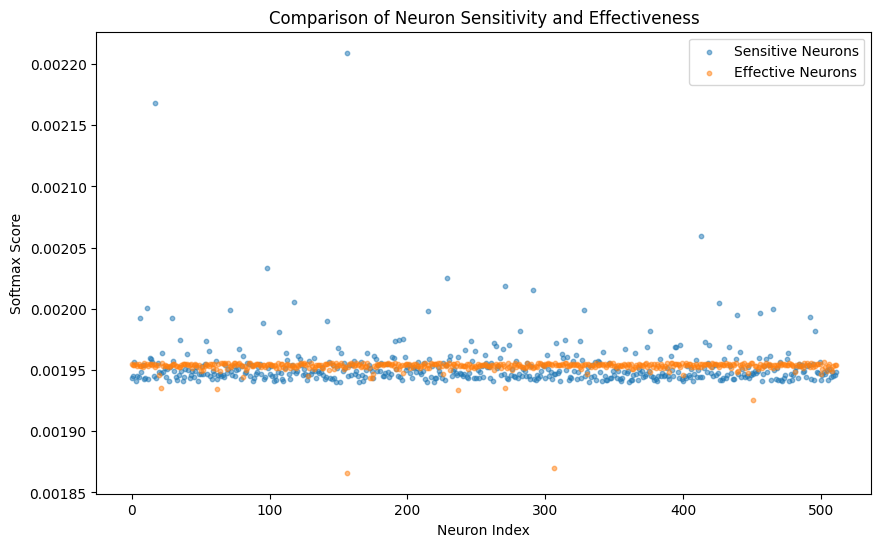

In [13]:


# get the array for the keys of sorted values of the sensitive neurons decreasing
sorted_indices = sorted(sensitive_neurons, key=sensitive_neurons.get, reverse=True)
sorted_indices2 = sorted(effective_neurons, key=effective_neurons.get, reverse=True)
sorted_indices = np.array(sorted_indices).astype(int)
print(sorted_indices)
print(sorted_indices2)

# Get the sensitive values in the order of sorted indices
sensitive_values_sorted = np.array([sensitive_neurons[str(i)] for i in sorted_indices])

# Get the effective values in the order of sorted indices
# Ensure that the keys are strings if they are stored as such in effective_neurons
effective_values_sorted = np.array([effective_neurons[str(i)] for i in sorted_indices])

# Now, you can use sensitive_values_sorted and effective_values_sorted for plotting or analysis

# Update the plotting code to use the sorted values
plt.figure(figsize=(10, 6))
plt.scatter(sorted_indices, sensitive_values_sorted, alpha=0.5, label='Sensitive Neurons', s=10)
plt.scatter(sorted_indices, effective_values_sorted, alpha=0.5, label='Effective Neurons', s=10)
plt.title('Comparison of Neuron Sensitivity and Effectiveness')
plt.xlabel('Neuron Index')
plt.ylabel('Softmax Score')
plt.legend()
plt.show()

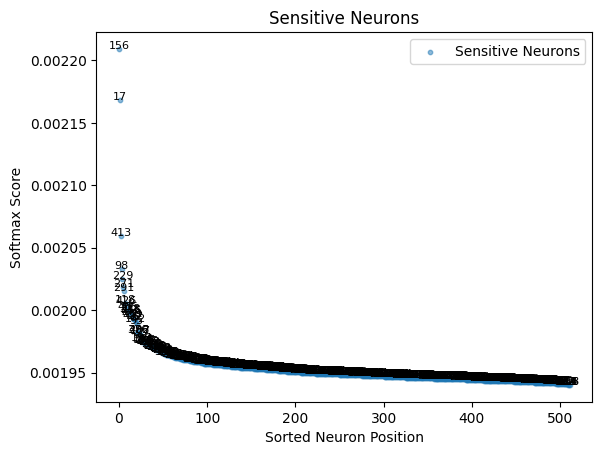

In [6]:
# Scatter plot
plt.scatter(range(len(sorted_indices)), sensitive_values_sorted, alpha=0.5, label='Sensitive Neurons', s=10)

# Annotate each point with its corresponding index from sorted_indices
for i, txt in enumerate(sorted_indices):
    plt.annotate(txt, (i, sensitive_values_sorted[i]), fontsize=8, ha='center')

plt.title('Sensitive Neurons')
plt.xlabel('Sorted Neuron Position')
plt.ylabel('Softmax Score')
plt.legend()
plt.show()

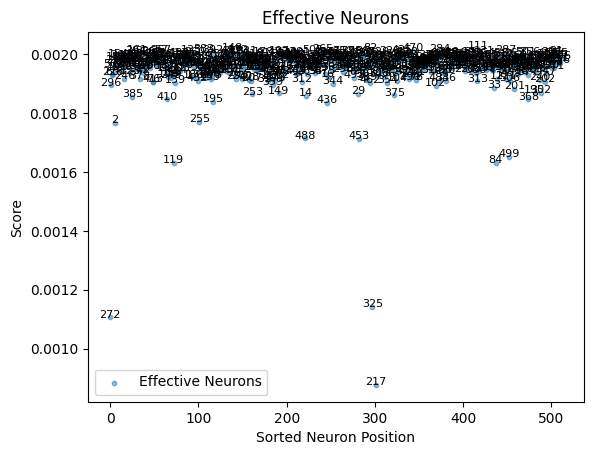

In [9]:
# Scatter plot for effective neurons
plt.scatter(range(len(sorted_indices2)), effective_values_sorted, alpha=0.5, label='Effective Neurons', s=10)

# Annotate each point with its corresponding index from sorted_indices_effective
for i, txt in enumerate(sorted_indices2):
    plt.annotate(txt, (i, effective_values_sorted[i]), fontsize=8, ha='center')

plt.title('Effective Neurons')
plt.xlabel('Sorted Neuron Position')
plt.ylabel('Score')
plt.legend()
plt.show()

# Anaslysis on 20 points per halu and non halu on 3 different scales

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns

In [2]:
working_dir = os.path.dirname(os.getcwd())
working_dir
data_dir = '/data/sensitivity/EleutherAI/pythia-'
modes = ['hallu', 'nonhallu']
sizes = ['410m', '1b', '2.8B']
data_per_mode = range(0,20)

In [3]:
with open(working_dir + data_dir + sizes[0] + '/' + modes[0] + '_' + str(0) + '_sensitivity.json') as f:
    data = json.load(f)

data

{'id': 0,
 'original_ES': 3.479788303375244,
 'sensitive_drop': -0.0940084457397461,
 'random_drop_avg': -0.00973464548587799,
 'mode': 'hallu'}

In [4]:
# Define the variables
working_dir = os.path.dirname(os.getcwd())
data_dir = 'data/sensitivity/EleutherAI/pythia-'
modes = ['hallu', 'nonhallu']
sizes = ['410m', '1b', '2.8B']
data_per_mode = range(0, 20)

# Initialize an empty list to store the data
data_list = []

# Iterate over all combinations of modes, sizes, and data_per_mode
for mode in modes:
    for size in sizes:
        for i in data_per_mode:
            file_path = os.path.join(working_dir, data_dir + size, f'{mode}_{i}_sensitivity.json')
            try:
                with open(file_path) as f:
                    data = json.load(f)
                    # Append the relevant data to the list
                    data_list.append({
                        'ID': len(data_list) + 1,
                        'original_ES': data.get('original_ES'),
                        'sensitive_drop': data.get('sensitive_drop'),
                        'random_drop_avg': data.get('random_drop_avg'),
                        'mode': mode,
                        'model_size': size.lower(),
                    })
            except FileNotFoundError:
                print(f"File not found: {file_path}")
            except json.JSONDecodeError:
                print(f"Error decoding JSON from file: {file_path}")

# Convert the list to a pandas DataFrame
df = pd.DataFrame(data_list)

# Display the DataFrame
print(df)

      ID  original_ES  sensitive_drop  random_drop_avg      mode model_size
0      1     3.479788       -0.094008        -0.009735     hallu       410m
1      2     1.402755       -0.354119        -0.008787     hallu       410m
2      3     3.559491       -0.017266        -0.008849     hallu       410m
3      4     3.629606       -0.067264        -0.008861     hallu       410m
4      5     3.367147       -0.006947        -0.008926     hallu       410m
..   ...          ...             ...              ...       ...        ...
115  116     6.112787       -0.052363        -0.003380  nonhallu       2.8b
116  117     5.977643       -0.023111        -0.003589  nonhallu       2.8b
117  118     5.910442       -0.030763        -0.003450  nonhallu       2.8b
118  119     5.803159       -0.035929        -0.003504  nonhallu       2.8b
119  120     6.066230       -0.039324        -0.003591  nonhallu       2.8b

[120 rows x 6 columns]


T-statistic: -9.562073922220911, P-value: 1.5320376215735404e-18
       mode model_size sensitive_drop           random_drop_avg          
                                 mean       std            mean       std
0     hallu         1b      -0.108702  0.078124       -0.004516  0.000106
1     hallu       2.8b      -0.039715  0.018639       -0.003544  0.000059
2     hallu       410m      -0.070312  0.109162       -0.009076  0.000240
3  nonhallu         1b      -0.097214  0.066242       -0.004484  0.000100
4  nonhallu       2.8b      -0.036229  0.012944       -0.003552  0.000077
5  nonhallu       410m      -0.057339  0.067226       -0.009098  0.000245


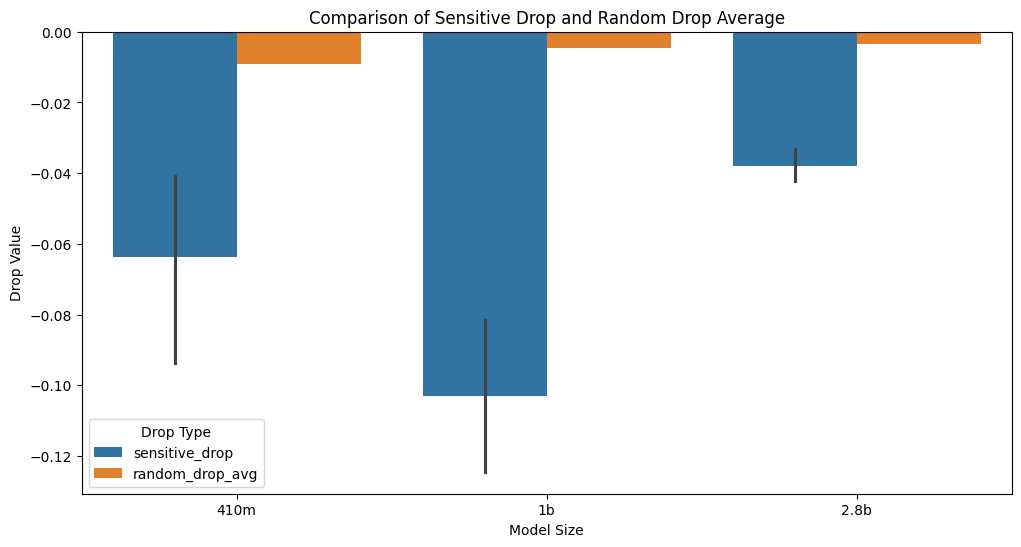

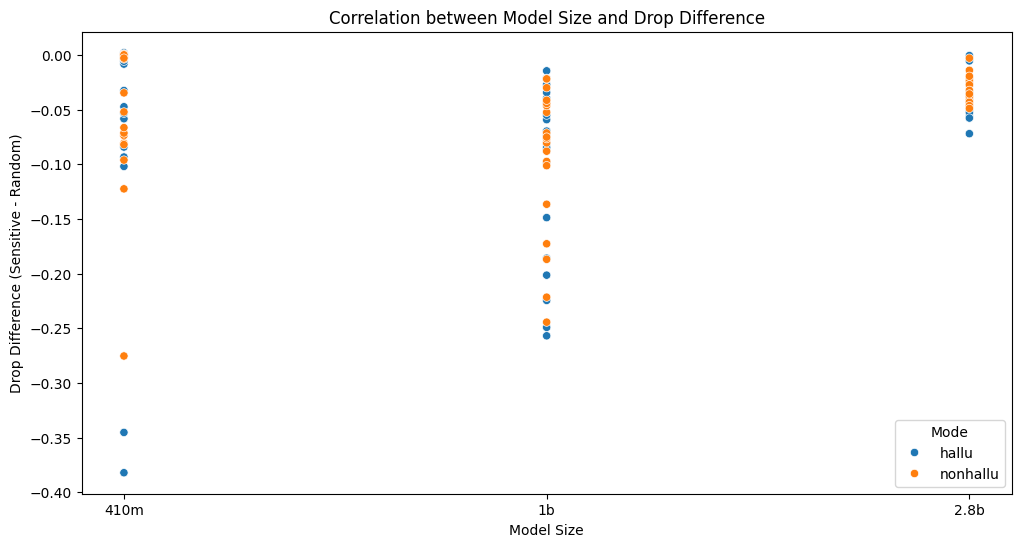

In [5]:
# 1. Statistical Analysis
# Perform a t-test to compare sensitive_drop and random_drop_avg
t_stat, p_value = stats.ttest_ind(df['sensitive_drop'], df['random_drop_avg'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Calculate mean and standard deviation for each mode and model size
summary_stats = df.groupby(['mode', 'model_size']).agg({
    'sensitive_drop': ['mean', 'std'],
    'random_drop_avg': ['mean', 'std']
}).reset_index()

print(summary_stats)

# 2. Visualization
# Bar plot to compare sensitive_drop and random_drop_avg for each mode and model size
plt.figure(figsize=(12, 6))
sns.barplot(x='model_size', y='value', hue='variable', data=pd.melt(df, id_vars=['mode', 'model_size'], value_vars=['sensitive_drop', 'random_drop_avg']))
plt.title('Comparison of Sensitive Drop and Random Drop Average')
plt.ylabel('Drop Value')
plt.xlabel('Model Size')
plt.legend(title='Drop Type')
plt.show()

# Scatter plot to show correlation between model size and the difference between sensitive_drop and random_drop_avg
df['drop_difference'] = df['sensitive_drop'] - df['random_drop_avg']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='model_size', y='drop_difference', hue='mode', data=df)
plt.title('Correlation between Model Size and Drop Difference')
plt.ylabel('Drop Difference (Sensitive - Random)')
plt.xlabel('Model Size')
plt.legend(title='Mode')
plt.show()

Hallu vs non hallu

Relative Sensitive Drop - T-statistic: -0.9033105273274186, P-value: 0.368201466131449
Relative Random Drop Avg - T-statistic: -0.2582740530710357, P-value: 0.7966453449658046
       mode relative_sensitive_drop           relative_random_drop_avg  \
                               mean       std                     mean   
0     hallu               -0.022206  0.049011                -0.001472   
1  nonhallu               -0.015922  0.022389                -0.001421   

             
        std  
0  0.001171  
1  0.000973  
Average Original ES for Hallu: 4.777473510305087
Average Original ES for Non-Hallu: 4.767504612604777


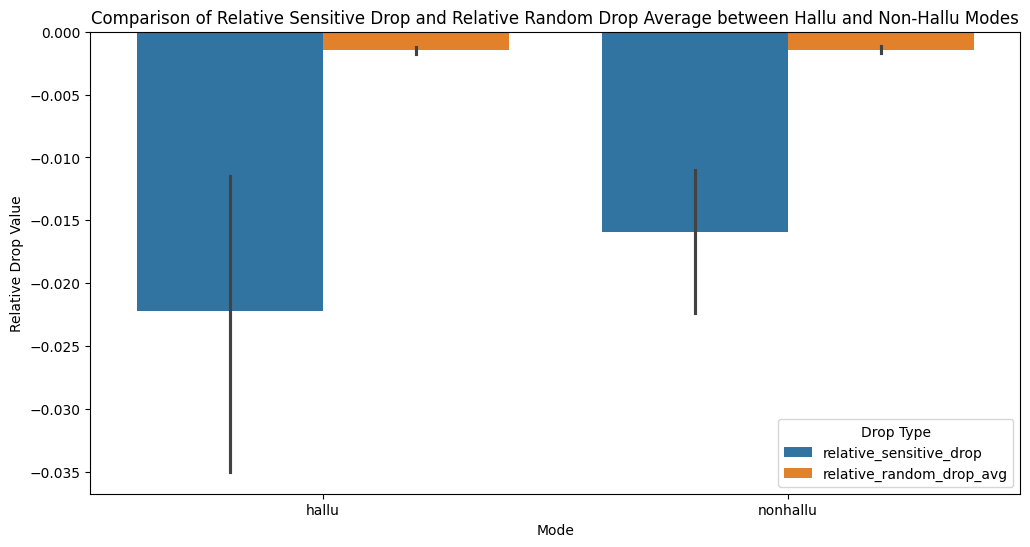

In [10]:


# Calculate relative drops
df['relative_sensitive_drop'] = df['sensitive_drop'] / df['original_ES']
df['relative_random_drop_avg'] = df['random_drop_avg'] / df['original_ES']

# Filter data for hallu and non-hallu modes
hallu_df = df[df['mode'] == 'hallu']
non_hallu_df = df[df['mode'] == 'nonhallu']

# 1. Statistical Analysis
# Perform a t-test to compare relative_sensitive_drop and relative_random_drop_avg between hallu and non-hallu modes
t_stat_sensitive, p_value_sensitive = stats.ttest_ind(hallu_df['relative_sensitive_drop'], non_hallu_df['relative_sensitive_drop'])
t_stat_random, p_value_random = stats.ttest_ind(hallu_df['relative_random_drop_avg'], non_hallu_df['relative_random_drop_avg'])

print(f"Relative Sensitive Drop - T-statistic: {t_stat_sensitive}, P-value: {p_value_sensitive}")
print(f"Relative Random Drop Avg - T-statistic: {t_stat_random}, P-value: {p_value_random}")

# Calculate mean and standard deviation for each mode
summary_stats = df.groupby('mode').agg({
    'relative_sensitive_drop': ['mean', 'std'],
    'relative_random_drop_avg': ['mean', 'std']
}).reset_index()

print(summary_stats)

avg_original_ES_hallu = hallu_df['original_ES'].mean()
avg_original_ES_non_hallu = non_hallu_df['original_ES'].mean()

print(f"Average Original ES for Hallu: {avg_original_ES_hallu}")
print(f"Average Original ES for Non-Hallu: {avg_original_ES_non_hallu}")


# 2. Visualization
# Bar plot to compare relative_sensitive_drop and relative_random_drop_avg for hallu and non-hallu modes
plt.figure(figsize=(12, 6))
sns.barplot(x='mode', y='value', hue='variable', data=pd.melt(df, id_vars=['mode'], value_vars=['relative_sensitive_drop', 'relative_random_drop_avg']))
plt.title('Comparison of Relative Sensitive Drop and Relative Random Drop Average between Hallu and Non-Hallu Modes')
plt.ylabel('Relative Drop Value')
plt.xlabel('Mode')
plt.legend(title='Drop Type')
plt.show()

In [9]:
df[df['mode'] == 'nonhallu'].original_ES.mean()

4.767504612604777

# Same experiments on the windows of training for deterministic drop out effectiveness

In [2]:
import os
import json
import pandas as pd

# Define the variables
working_dir = os.path.dirname(os.getcwd())
data_dir = 'data/sensitivity/EleutherAI/pythia-'
modes = ['hallu', 'nonhallu']
sizes = ['410M']
data_per_mode = range(0, 20)
windows = [(131, 135), (135, 139), (139, 143)]  # Define the windows

# Initialize an empty list to store the data
data_list = []

# Iterate over all combinations of modes, sizes, data_per_mode, and windows
for mode in modes:
    for size in sizes:
        for start, end in windows:
            for i in data_per_mode:
                file_path = os.path.join(working_dir, f"{data_dir}{size}/{start}-{end}/{mode}_{i}_sensitivity.json")
                try:
                    with open(file_path) as f:
                        data = json.load(f)
                        # Append the relevant data to the list
                        data_list.append({
                            'ID': len(data_list) + 1,
                            'original_ES': data.get('original_ES'),
                            'sensitive_drop': data.get('sensitive_drop'),
                            'random_drop_avg': data.get('random_drop_avg'),
                            'mode': mode,
                            'model_size': size.lower(),
                            'window': f"{start}-{end}"
                        })
                except FileNotFoundError:
                    print(f"File not found: {file_path}")
                except json.JSONDecodeError:
                    print(f"Error decoding JSON from file: {file_path}")

# Convert the list to a pandas DataFrame
df = pd.DataFrame(data_list)

# Display the DataFrame
print(df)


      ID  original_ES  sensitive_drop  random_drop_avg      mode model_size  \
0      1   -62.090168      -57.231853       -58.538258     hallu       410m   
1      2   -42.435539      -60.978745       -59.597977     hallu       410m   
2      3   -68.109253      -56.798462       -59.303780     hallu       410m   
3      4   -80.296738      -53.257904       -58.246826     hallu       410m   
4      5   -58.588341      -62.066284       -58.924652     hallu       410m   
..   ...          ...             ...              ...       ...        ...   
115  116   -47.633404      -51.986881       -59.218250  nonhallu       410m   
116  117   -64.213272      -52.332481       -56.914078  nonhallu       410m   
117  118   -66.099258      -59.754097       -58.362076  nonhallu       410m   
118  119   -34.201771      -51.927608       -59.014194  nonhallu       410m   
119  120   -64.674606      -58.607155       -58.080002  nonhallu       410m   

      window  
0    131-135  
1    131-135  
2    1

Analysis for Window: 131-135
T-statistic: 4.1951012331973665, P-value: 7.154291695798773e-05
       mode sensitive_drop           random_drop_avg          
                      mean       std            mean       std
0     hallu     -56.246651  3.993452      -58.790688  0.961310
1  nonhallu     -55.456726  4.755102      -58.811030  0.875292


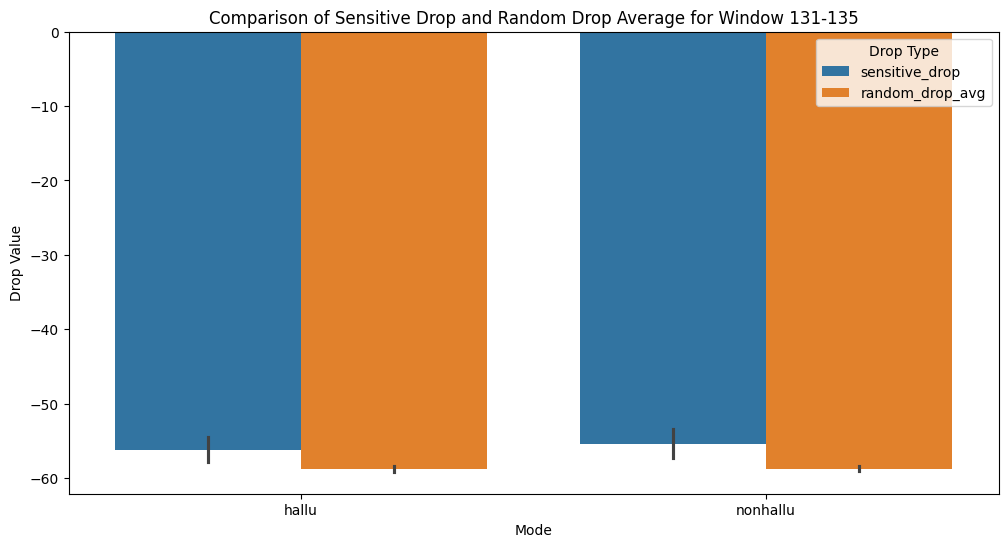

/tmp/ipykernel_3275557/2575796533.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['drop_difference'] = df_window['sensitive_drop'] - df_window['random_drop_avg']
/tmp/ipykernel_3275557/2575796533.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Mode')


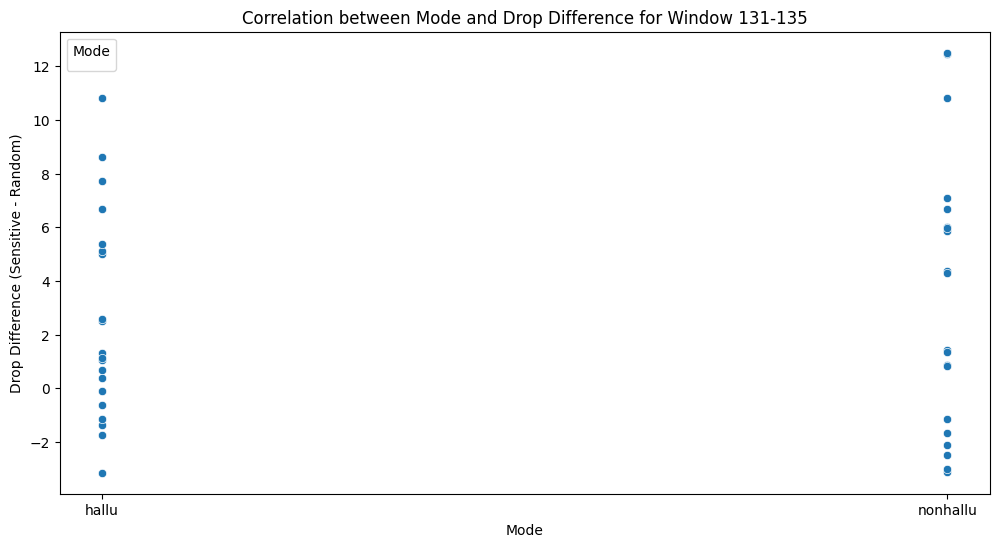

Analysis for Window: 135-139
T-statistic: 4.893551733761875, P-value: 5.22365697337185e-06
       mode sensitive_drop           random_drop_avg          
                      mean       std            mean       std
0     hallu     -54.001906  4.654362      -58.305856  0.511971
1  nonhallu     -55.162630  4.936891      -58.320784  0.849711


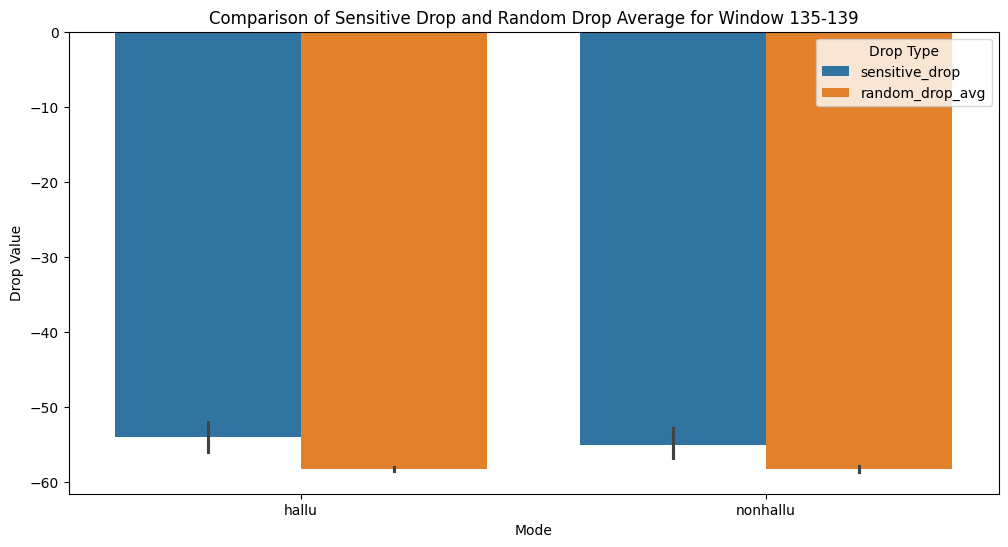

/tmp/ipykernel_3275557/2575796533.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['drop_difference'] = df_window['sensitive_drop'] - df_window['random_drop_avg']
/tmp/ipykernel_3275557/2575796533.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Mode')


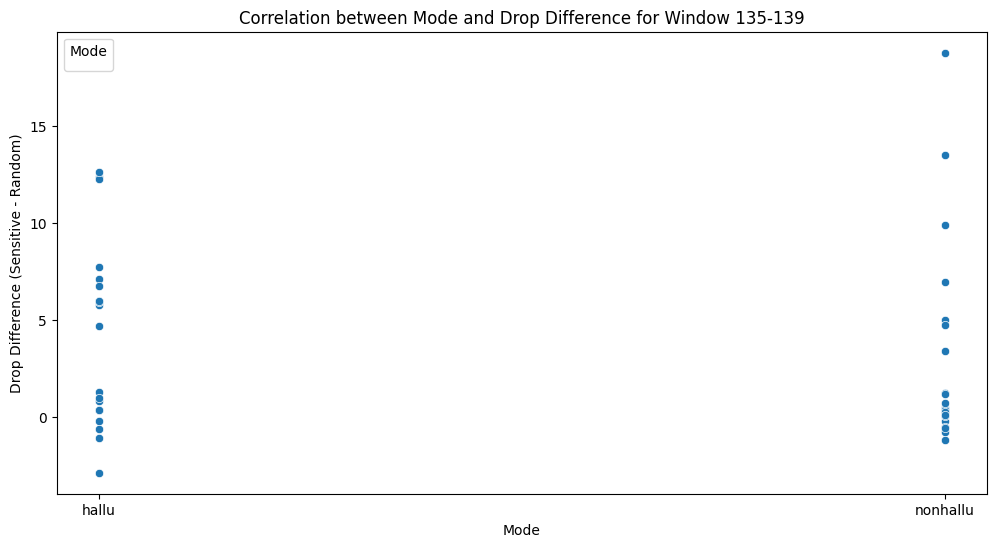

Analysis for Window: 139-143
T-statistic: 5.2663667653163495, P-value: 1.1972278238902776e-06
       mode sensitive_drop           random_drop_avg          
                      mean       std            mean       std
0     hallu     -54.348106  4.055436      -57.771618  0.797716
1  nonhallu     -53.528317  5.268954      -57.967728  0.733605


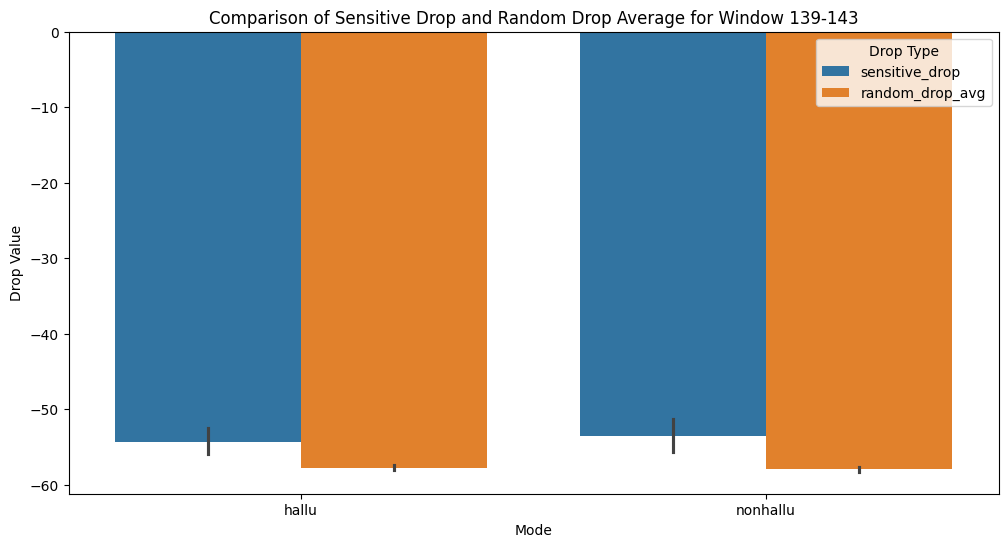

/tmp/ipykernel_3275557/2575796533.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['drop_difference'] = df_window['sensitive_drop'] - df_window['random_drop_avg']
/tmp/ipykernel_3275557/2575796533.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Mode')


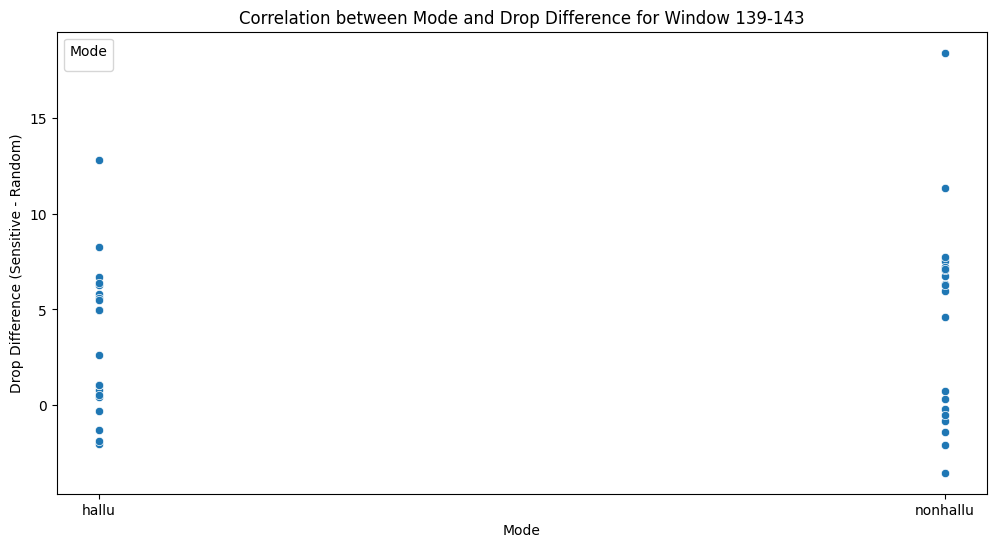

In [3]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for the 410M model
df_410M = df[df['model_size'] == '410m']

# Iterate over each window and perform the analysis
for window in df_410M['window'].unique():
    print(f"Analysis for Window: {window}")
    df_window = df_410M[df_410M['window'] == window]
    
    # 1. Statistical Analysis
    # Perform a t-test to compare sensitive_drop and random_drop_avg
    t_stat, p_value = stats.ttest_ind(df_window['sensitive_drop'], df_window['random_drop_avg'])
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
    
    # Calculate mean and standard deviation for each mode
    summary_stats = df_window.groupby(['mode']).agg({
        'sensitive_drop': ['mean', 'std'],
        'random_drop_avg': ['mean', 'std']
    }).reset_index()
    
    print(summary_stats)
    
    # 2. Visualization
    # Bar plot to compare sensitive_drop and random_drop_avg for each mode
    plt.figure(figsize=(12, 6))
    sns.barplot(x='mode', y='value', hue='variable', 
                data=pd.melt(df_window, id_vars=['mode'], value_vars=['sensitive_drop', 'random_drop_avg']))
    plt.title(f'Comparison of Sensitive Drop and Random Drop Average for Window {window}')
    plt.ylabel('Drop Value')
    plt.xlabel('Mode')
    plt.legend(title='Drop Type')
    plt.show()
    
    # Scatter plot to show correlation between mode and the difference between sensitive_drop and random_drop_avg
    df_window['drop_difference'] = df_window['sensitive_drop'] - df_window['random_drop_avg']
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='mode', y='drop_difference', data=df_window)
    plt.title(f'Correlation between Mode and Drop Difference for Window {window}')
    plt.ylabel('Drop Difference (Sensitive - Random)')
    plt.xlabel('Mode')
    plt.legend(title='Mode')
    plt.show()
